In [636]:
import tensorflow as tf
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
#from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [637]:
from datetime import date
from datetime  import timedelta
today = date.today()
#today = today  - timedelta(days=1)
pass_1000_days = today - timedelta(days=2000)

print(today)
print(pass_1000_days)

2022-11-17
2017-05-27


In [638]:
df = web.DataReader('CPALL.BK',data_source = 'yahoo',start = pass_1000_days, end = today)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-29,63.00,62.50,62.75,63.00,8862100.0,56.950829
2017-05-30,63.00,62.50,63.00,62.75,2042500.0,56.724838
2017-05-31,63.00,62.25,62.75,62.50,20754600.0,56.498837
2017-06-01,62.75,62.25,62.75,62.25,9404500.0,56.272850
2017-06-02,62.75,62.25,62.50,62.50,12081200.0,56.498837
...,...,...,...,...,...,...
2022-11-11,61.50,60.75,61.50,61.50,25110400.0,61.500000
2022-11-14,62.00,60.75,61.50,61.50,25623300.0,61.500000
2022-11-15,61.50,61.00,61.50,61.50,13058300.0,61.500000


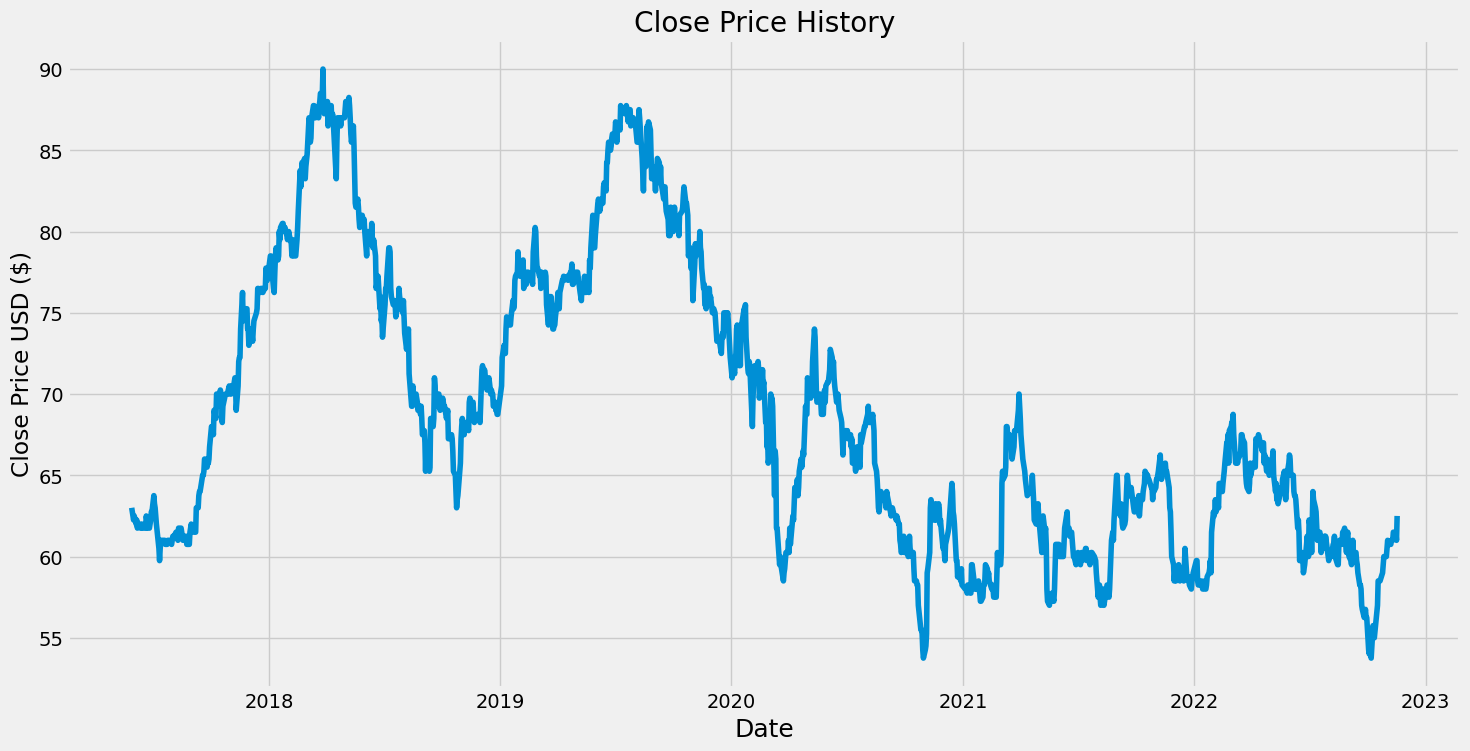

In [639]:
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD ($)')
plt.show()

In [640]:
####WINDOWED DATA 5 train 1 target and date of target
length_of_window =25
index_list = [] # list
target_date= [] # list

new_df = pd.DataFrame()
for j in range(length_of_window):#create data frame for append
    
    new_df['COLUMNS'+str(j+1)] = [] #set columns in list
    index_list.append('COLUMNS'+str(j+1))#set columns in list
     
    
for i in range(len(df)-(length_of_window-1)) :
    x = df['Close'][i:length_of_window+i] # get close values
    print(df.index[(length_of_window-1)+i])
    
    target_date.append(df.index[(length_of_window-1)+i])   
   
    values=x.set_axis(index_list).to_frame().transpose().reset_index(drop=True) #set columnsname > change type to df > tranpose
    new_df = pd.concat([new_df,values])
    print(values)
    

2017-06-30 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      63.0     62.75      62.5     62.25      62.5      62.0     62.25   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     61.75      62.0       62.0  ...      61.75      61.75       62.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      62.25      61.75      61.75       62.0      62.25      62.75      62.75  

[1 rows x 25 columns]
2017-07-03 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     62.75      62.5     62.25      62.5      62.0     62.25     61.75   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      62.0      62.0      61.75  ...      61.75       62.5      62.25   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      61.75      61.75       62.0      62.25      62.75      62.75      63.75  

[1 rows x 25

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     61.25     61.25     60.75     60.75     60.75      61.5     61.75   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      62.0     61.75       61.5  ...      63.75       64.0       64.0   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      64.25       65.0       65.0      65.25       66.0       66.0       65.5  

[1 rows x 25 columns]
2017-09-26 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     61.25     60.75     60.75     60.75      61.5     61.75      62.0   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     61.75      61.5       61.5  ...       64.0       64.0      64.25   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       65.0       65.0      65.25       66.0       66.0       65.5      65.75  

[1 rows x 25 columns]
2017-09-27

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     70.25      70.0      69.5     68.25     69.25      70.0      70.0   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      70.0      70.5       70.0  ...       71.0       70.5       69.0   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       70.5       72.0      72.25      72.25       74.0      76.25       74.5  

[1 rows x 25 columns]
2017-11-22 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      70.0      69.5     68.25     69.25      70.0      70.0      70.0   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      70.5      70.0       70.0  ...       70.5       69.0       70.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       72.0      72.25      72.25       74.0      76.25       74.5       75.0  

[1 rows x 25 columns]
2017-11-23

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     73.25      74.0      74.5      75.0     75.25      76.5      76.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     76.25      76.5       76.5  ...       77.5       77.0       78.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       78.5      77.75       76.5      76.25       77.5       78.5       79.0  

[1 rows x 25 columns]
2018-01-15 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      74.0      74.5      75.0     75.25      76.5      76.5     76.25   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      76.5      76.5       76.5  ...       77.0       78.5       78.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      77.75       76.5      76.25       77.5       78.5       79.0      78.25  

[1 rows x 25 columns]
2018-01-16

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      80.0     79.75     79.25      78.5      79.5     79.25      78.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      78.5      79.0       79.5  ...      84.25       84.0       84.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      83.25       84.0      84.75       87.0       86.5       85.5      85.75  

[1 rows x 25 columns]
2018-03-09 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     79.75     79.25      78.5      79.5     79.25      78.5      78.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      79.0      79.5      80.25  ...       84.0       84.5      83.25   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       84.0      84.75       87.0       86.5       85.5      85.75       87.0  

[1 rows x 25 columns]
2018-03-12

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     87.75      88.0      88.5      88.5      90.0     87.75     87.25   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      88.0      87.5       88.0  ...       87.0      83.25       85.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       87.0       87.0       87.0       86.5       87.0       87.0       87.0  

[1 rows x 25 columns]
2018-04-30 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      88.0      88.5      88.5      90.0     87.75     87.25      88.0   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      87.5      88.0       86.5  ...      83.25       85.5       87.0   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       87.0       87.0       86.5       87.0       87.0       87.0       87.0  

[1 rows x 25 columns]
2018-05-02

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      85.5      86.5     85.25      83.5     81.75      81.5      82.0   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      81.5     80.75      80.25  ...       78.5      79.75       80.0   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      79.75      79.25       79.5       80.5       79.5       79.0       79.5  

[1 rows x 25 columns]
2018-06-18 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      86.5     85.25      83.5     81.75      81.5      82.0      81.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     80.75     80.25       80.5  ...      79.75       80.0      79.75   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      79.25       79.5       80.5       79.5       79.0       79.5       78.5  

[1 rows x 25 columns]
2018-06-19

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      74.5     74.75      73.5      75.0      75.5      76.5      76.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     77.25      79.0       79.0  ...      75.75       75.5      74.75   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       75.5      75.25       76.5       76.0       75.0      75.75      74.75  

[1 rows x 25 columns]
2018-08-03 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     74.75      73.5      75.0      75.5      76.5      76.5     77.25   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      79.0      79.0      78.75  ...       75.5      74.75       75.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      75.25       76.5       76.0       75.0      75.75      74.75      73.75  

[1 rows x 25 columns]
2018-08-06

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      66.5     65.25      65.5      68.5      68.5      68.0      68.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      71.0      70.5       69.5  ...       69.5      69.75       69.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      69.25      69.25       68.5      68.75       69.0      67.25      67.25  

[1 rows x 25 columns]
2018-10-16 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     65.25      65.5      68.5      68.5      68.0      68.5      71.0   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      70.5      69.5      69.25  ...      69.75       69.5      69.25   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      69.25       68.5      68.75       69.0      67.25      67.25       67.5  

[1 rows x 25 columns]
2018-10-17

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     72.25      73.0      72.5      72.5      74.0     74.75      74.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     74.25     74.25      74.25  ...      77.25       77.5      78.75   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       78.0      77.75      77.25      77.75       78.0      78.25       76.5  

[1 rows x 25 columns]
2019-02-08 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      73.0      72.5      72.5      74.0     74.75      74.5     74.25   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     74.25     74.25      74.75  ...       77.5      78.75       78.0   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      77.75      77.25      77.75       78.0      78.25       76.5      76.75  

[1 rows x 25 columns]
2019-02-11

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     77.25      76.5     76.25     76.75     76.25     78.25     77.75   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      79.0      81.0       80.5  ...      81.75      81.25       82.0   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      81.75      81.75      82.75       83.0       82.5      84.25      84.25  

[1 rows x 25 columns]
2019-06-20 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      76.5     76.25     76.75     76.25     78.25     77.75      79.0   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      81.0      80.5       79.0  ...      81.25       82.0      81.75   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      81.75      82.75       83.0       82.5      84.25      84.25       85.0  

[1 rows x 25 columns]
2019-06-21

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      87.0      84.5      83.5      82.5      84.5      84.0     84.75   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      86.5      85.5      86.75  ...       83.5       82.5       84.0   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      83.75       84.5      84.25       83.0       84.0       83.0      82.75  

[1 rows x 25 columns]
2019-09-16 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      84.5      83.5      82.5      84.5      84.0     84.75      86.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      85.5     86.75      86.25  ...       82.5       84.0      83.75   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       84.5      84.25       83.0       84.0       83.0      82.75       82.0  

[1 rows x 25 columns]
2019-09-17

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     80.25     79.75      81.0     81.25      81.5     82.25     82.75   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     81.75     81.75       81.0  ...      75.75       78.0      79.25   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       78.5      79.25      78.75       79.0       80.0       79.0      78.75  

[1 rows x 25 columns]
2019-11-15 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     79.75      81.0     81.25      81.5     82.25     82.75     81.75   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     81.75      81.0       78.5  ...       78.0      79.25       78.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      79.25      78.75       79.0       80.0       79.0      78.75      77.75  

[1 rows x 25 columns]
2019-11-18

2020-01-31 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      75.0      74.5     72.25      71.0     71.75     71.25     72.25   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      72.5      74.0      74.25  ...       75.0      75.25      74.75   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       75.5       73.5       71.5      71.25       72.0      71.75      70.75  

[1 rows x 25 columns]
2020-02-03 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      74.5     72.25      71.0     71.75     71.25     72.25      72.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      74.0     74.25      71.75  ...      75.25      74.75       75.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       73.5       71.5      71.25       72.0      71.75      70.75       68.0  

[1 rows x 25

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     68.25     68.75     66.75      67.5     65.75      66.5      70.0   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      69.0     69.75      69.25  ...       60.0       59.5       60.0   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       59.5      59.25       58.5       59.0      59.25      59.75      60.25  

[1 rows x 25 columns]
2020-03-30 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     68.75     66.75      67.5     65.75      66.5      70.0      69.0   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     69.75     69.25      63.75  ...       59.5       60.0       59.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      59.25       58.5       59.0      59.25      59.75      60.25      60.25  

[1 rows x 25 columns]
2020-03-31

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     69.25     68.75     68.75      71.0     69.75      70.0      72.0   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      74.0      73.5      71.75  ...       69.5      68.75      68.75   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      69.75      70.25       69.5       70.5      70.75      70.75       71.5  

[1 rows x 25 columns]
2020-06-05 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     68.75     68.75      71.0     69.75      70.0      72.0      74.0   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      73.5     71.75      70.25  ...      68.75      68.75      69.75   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      70.25       69.5       70.5      70.75      70.75       71.5      72.75  

[1 rows x 25 columns]
2020-06-08

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      68.5     68.25     67.25     66.25      67.5     67.75     67.75   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      67.5     67.75      67.25  ...      65.75      65.25      66.25   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      66.75       66.0      65.75       65.5       67.5       67.0       68.0  

[1 rows x 25 columns]
2020-07-30 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     68.25     67.25     66.25      67.5     67.75     67.75      67.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     67.75     67.25       67.5  ...      65.25      66.25      66.75   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       66.0      65.75       65.5       67.5       67.0       68.0       68.0  

[1 rows x 25 columns]
2020-07-31

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     65.25     64.75      64.0      63.0     62.75      64.0      63.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      63.5     63.75       63.5  ...       62.5      62.75       63.0   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       62.5       62.5       62.5      62.25       62.5       62.0       62.0  

[1 rows x 25 columns]
2020-09-23 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     64.75      64.0      63.0     62.75      64.0      63.5      63.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     63.75      63.5       63.5  ...      62.75       63.0       62.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       62.5       62.5      62.25       62.5       62.0       62.0       61.0  

[1 rows x 25 columns]
2020-09-24

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      60.0     60.25     61.25      60.5      60.0     60.25     59.25   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      58.5      58.5      58.25  ...      54.25      53.75      54.25   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       54.5      55.25       59.0      59.25      60.25       63.0       63.5  

[1 rows x 25 columns]
2020-11-12 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     60.25     61.25      60.5      60.0     60.25     59.25      58.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      58.5     58.25      58.25  ...      53.75      54.25       54.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      55.25       59.0      59.25      60.25       63.0       63.5      62.75  

[1 rows x 25 columns]
2020-11-13

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     62.25     61.75      60.5     60.75     60.25     59.75     60.75   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      61.5     61.75       64.5  ...      59.75      58.75       59.0   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       59.0       58.5      59.25      58.25       58.0       58.0       58.0  

[1 rows x 25 columns]
2021-01-07 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     61.75      60.5     60.75     60.25     59.75     60.75      61.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     61.75      64.5       64.0  ...      58.75       59.0       59.0   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       58.5      59.25      58.25       58.0       58.0       58.0      57.75  

[1 rows x 25 columns]
2021-01-08

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      59.5      58.5      58.0      58.0     58.25      58.0      58.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      58.0     57.75      57.25  ...       59.5      59.25      58.75   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       59.0       58.5       58.0      58.25       58.0       57.5      57.75  

[1 rows x 25 columns]
2021-02-22 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      58.5      58.0      58.0     58.25      58.0      58.5      58.0   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     57.75     57.25      57.25  ...      59.25      58.75       59.0   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       58.5       58.0      58.25       58.0       57.5      57.75       57.5  

[1 rows x 25 columns]
2021-02-23

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     64.75      65.0      65.5      68.0      68.0      67.5      67.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     66.75      67.0      66.75  ...      67.75       69.0       70.0   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      69.25       68.5       67.5       66.0       65.5      65.25      64.75  

[1 rows x 25 columns]
2021-04-12 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      65.0      65.5      68.0      68.0      67.5      67.5     66.75   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      67.0     66.75       66.0  ...       69.0       70.0      69.25   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       68.5       67.5       66.0       65.5      65.25      64.75      63.75  

[1 rows x 25 columns]
2021-04-16

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     60.25     61.25      62.5      61.5     61.75     60.75      58.0   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     57.25      57.0       57.5  ...      60.75      60.75      60.75   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      60.75       60.0       60.0       60.0       60.0      60.75      61.75  

[1 rows x 25 columns]
2021-06-11 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     61.25      62.5      61.5     61.75     60.75      58.0     57.25   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      57.0      57.5       57.5  ...      60.75      60.75      60.75   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       60.0       60.0       60.0       60.0      60.75      61.75       62.0  

[1 rows x 25 columns]
2021-06-14

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      60.0     60.25     59.75     60.25      60.0      60.5      60.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     59.75     60.25       60.0  ...      59.75       59.0       57.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       58.0      58.25       57.5       57.0      57.75       58.0       57.0  

[1 rows x 25 columns]
2021-08-13 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     60.25     59.75     60.25      60.0      60.5      60.5     59.75   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     60.25      60.0       59.5  ...       59.0       57.5       58.0   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      58.25       57.5       57.0      57.75       58.0       57.0       57.5  

[1 rows x 25 columns]
2021-08-16

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     62.25     64.25      65.0      65.0      64.0      63.0      62.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     63.25     62.75       62.0  ...       65.0      63.75      64.25   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      63.75      64.25       63.0      62.75      62.75       63.5       63.0  

[1 rows x 25 columns]
2021-10-04 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     64.25      65.0      65.0      64.0      63.0      62.5     63.25   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     62.75      62.0      61.75  ...      63.75      64.25      63.75   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      64.25       63.0      62.75      62.75       63.5       63.0      63.25  

[1 rows x 25 columns]
2021-10-05

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      65.0     64.75     64.75     64.25     64.25      63.5     64.25   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      64.0     64.25      64.75  ...      64.75      65.25      65.25   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       65.5      65.75      65.25      65.25       65.0      64.25       63.0  

[1 rows x 25 columns]
2021-11-24 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     64.75     64.75     64.25     64.25      63.5     64.25      64.0   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     64.25     64.75      64.75  ...      65.25      65.25       65.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      65.75      65.25      65.25       65.0      64.25       63.0      62.75  

[1 rows x 25 columns]
2021-11-25

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      59.0      58.5     59.25     59.25      58.5     59.25      60.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     58.75     58.75       58.5  ...       59.0      59.75      59.75   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       58.5      58.25      58.25      58.25       58.5      58.25       58.0  

[1 rows x 25 columns]
2022-01-17 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      58.5     59.25     59.25      58.5     59.25      60.5     58.75   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     58.75      58.5      58.75  ...      59.75      59.75       58.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      58.25      58.25      58.25       58.5      58.25       58.0       58.5  

[1 rows x 25 columns]
2022-01-18

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      61.5     62.75      62.5     62.75      63.5     62.75     63.25   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      63.0      64.5       64.5  ...       67.0       67.0       67.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      65.75      67.75       68.0      68.25      68.25      68.75       67.5  

[1 rows x 25 columns]
2022-03-07 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     62.75      62.5     62.75      63.5     62.75     63.25      63.0   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      64.5      64.5      64.25  ...       67.0       67.5      65.75   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      67.75       68.0      68.25      68.25      68.75       67.5      65.75  

[1 rows x 25 columns]
2022-03-08

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      64.5     64.25      64.0      64.5     65.75      65.0     65.25   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     65.75     65.75       65.5  ...       67.0      65.75      66.25   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      65.25       66.0       65.5       65.5       65.0       65.5       66.5  

[1 rows x 25 columns]
2022-05-06 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     64.25      64.0      64.5     65.75      65.0     65.25     65.75   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     65.75      65.5      67.25  ...      65.75      66.25      65.25   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       66.0       65.5       65.5       65.0       65.5       66.5       65.0  

[1 rows x 25 columns]
2022-05-09

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      64.0     64.75     65.25      64.0      63.5      64.0      65.0   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     65.75     66.25       66.0  ...       63.5      61.75      62.25   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       61.5      59.75       60.0      60.25       60.0       59.0      59.25  

[1 rows x 25 columns]
2022-06-24 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     64.75     65.25      64.0      63.5      64.0      65.0     65.75   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     66.25      66.0       65.0  ...      61.75      62.25       61.5   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      59.75       60.0      60.25       60.0       59.0      59.25       59.5  

[1 rows x 25 columns]
2022-06-27

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     62.25      61.5     60.25      62.0      64.0      63.5      63.0   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     62.75      61.0      61.25  ...      61.25       60.5      61.25   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      59.75       60.0       60.0       60.0       60.0      60.75      60.75  

[1 rows x 25 columns]
2022-08-10 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      61.5     60.25      62.0      64.0      63.5      63.0     62.75   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      61.0     61.25       61.5  ...       60.5      61.25      59.75   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       60.0       60.0       60.0       60.0      60.75      60.75      61.25  

[1 rows x 25 columns]
2022-08-11

2022-09-20 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     60.75      61.0      61.0     60.75      61.5      61.5      61.5   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     61.75     60.25      61.25  ...      60.25       61.0       60.0   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      60.25      60.25      59.75       59.5       59.0      58.25      58.25  

[1 rows x 25 columns]
2022-09-21 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0      61.0      61.0     60.75      61.5      61.5      61.5     61.75   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     60.25     61.25       61.5  ...       61.0       60.0      60.25   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0      60.25      59.75       59.5       59.0      58.25      58.25       58.0  

[1 rows x 25

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     56.25     56.25     54.25      54.0      55.0     54.25     53.75   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0     55.75      55.0       55.0  ...       59.0       59.5       60.0   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       60.0       60.0       60.5       61.0      60.75      60.75      60.75  

[1 rows x 25 columns]
2022-11-08 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5  COLUMNS6  COLUMNS7  \
0     56.25     54.25      54.0      55.0     54.25     53.75     55.75   

   COLUMNS8  COLUMNS9  COLUMNS10  ...  COLUMNS16  COLUMNS17  COLUMNS18  \
0      55.0      55.0       57.0  ...       59.5       60.0       60.0   

   COLUMNS19  COLUMNS20  COLUMNS21  COLUMNS22  COLUMNS23  COLUMNS24  COLUMNS25  
0       60.0       60.5       61.0      60.75      60.75      60.75       61.0  

[1 rows x 25 columns]
2022-11-09

In [641]:
new_df = new_df.reset_index()
TD_series = pd.Series(target_date)
new_df= pd.concat([new_df,TD_series],ignore_index=True , axis = 1)
new_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0,63.00,62.75,62.50,62.25,62.50,62.00,62.25,61.75,62.00,...,61.75,62.50,62.25,61.75,61.75,62.00,62.25,62.75,62.75,2017-06-30
1,0,62.75,62.50,62.25,62.50,62.00,62.25,61.75,62.00,62.00,...,62.50,62.25,61.75,61.75,62.00,62.25,62.75,62.75,63.75,2017-07-03
2,0,62.50,62.25,62.50,62.00,62.25,61.75,62.00,62.00,61.75,...,62.25,61.75,61.75,62.00,62.25,62.75,62.75,63.75,63.25,2017-07-04
3,0,62.25,62.50,62.00,62.25,61.75,62.00,62.00,61.75,62.00,...,61.75,61.75,62.00,62.25,62.75,62.75,63.75,63.25,63.00,2017-07-05
4,0,62.50,62.00,62.25,61.75,62.00,62.00,61.75,62.00,62.00,...,61.75,62.00,62.25,62.75,62.75,63.75,63.25,63.00,62.50,2017-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,0,55.00,54.25,53.75,55.75,55.00,55.00,57.00,58.50,58.50,...,60.50,61.00,60.75,60.75,60.75,61.00,61.00,61.00,61.50,2022-11-11
1304,0,54.25,53.75,55.75,55.00,55.00,57.00,58.50,58.50,58.50,...,61.00,60.75,60.75,60.75,61.00,61.00,61.00,61.50,61.50,2022-11-14
1305,0,53.75,55.75,55.00,55.00,57.00,58.50,58.50,58.50,58.50,...,60.75,60.75,60.75,61.00,61.00,61.00,61.50,61.50,61.50,2022-11-15
1306,0,55.75,55.00,55.00,57.00,58.50,58.50,58.50,58.50,59.00,...,60.75,60.75,61.00,61.00,61.00,61.50,61.50,61.50,61.00,2022-11-16


In [642]:
new_df = new_df.drop(0 ,axis=1)
new_df

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
0,63.00,62.75,62.50,62.25,62.50,62.00,62.25,61.75,62.00,62.00,...,61.75,62.50,62.25,61.75,61.75,62.00,62.25,62.75,62.75,2017-06-30
1,62.75,62.50,62.25,62.50,62.00,62.25,61.75,62.00,62.00,61.75,...,62.50,62.25,61.75,61.75,62.00,62.25,62.75,62.75,63.75,2017-07-03
2,62.50,62.25,62.50,62.00,62.25,61.75,62.00,62.00,61.75,62.00,...,62.25,61.75,61.75,62.00,62.25,62.75,62.75,63.75,63.25,2017-07-04
3,62.25,62.50,62.00,62.25,61.75,62.00,62.00,61.75,62.00,62.00,...,61.75,61.75,62.00,62.25,62.75,62.75,63.75,63.25,63.00,2017-07-05
4,62.50,62.00,62.25,61.75,62.00,62.00,61.75,62.00,62.00,61.75,...,61.75,62.00,62.25,62.75,62.75,63.75,63.25,63.00,62.50,2017-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,55.00,54.25,53.75,55.75,55.00,55.00,57.00,58.50,58.50,58.50,...,60.50,61.00,60.75,60.75,60.75,61.00,61.00,61.00,61.50,2022-11-11
1304,54.25,53.75,55.75,55.00,55.00,57.00,58.50,58.50,58.50,58.50,...,61.00,60.75,60.75,60.75,61.00,61.00,61.00,61.50,61.50,2022-11-14
1305,53.75,55.75,55.00,55.00,57.00,58.50,58.50,58.50,58.50,59.00,...,60.75,60.75,60.75,61.00,61.00,61.00,61.50,61.50,61.50,2022-11-15
1306,55.75,55.00,55.00,57.00,58.50,58.50,58.50,58.50,59.00,59.50,...,60.75,60.75,61.00,61.00,61.00,61.50,61.50,61.50,61.00,2022-11-16


In [643]:
new_df_NP =  new_df.to_numpy()
Dates = new_df_NP[:, new_df_NP.shape[1]-1] 

mid_df = new_df_NP[:  , 0: -2]
X = mid_df.reshape((len(new_df_NP), new_df_NP.shape[1]-2 ,1)) #Convert to  ( 5 , 1 ) row = 656
y = new_df_NP[:,-2]

X= X.astype('float32')
y= y.astype('float32')
Dates.shape , X.shape , y.shape

((1308,), (1308, 24, 1), (1308,))

In [644]:
new_df_NP[:,-2]

array([62.75, 63.75, 63.25, ..., 61.5, 61.0, 62.5], dtype=object)

In [645]:
mid_df

array([[63.0, 62.75, 62.5, ..., 62.0, 62.25, 62.75],
       [62.75, 62.5, 62.25, ..., 62.25, 62.75, 62.75],
       [62.5, 62.25, 62.5, ..., 62.75, 62.75, 63.75],
       ...,
       [53.75, 55.75, 55.0, ..., 61.0, 61.5, 61.5],
       [55.75, 55.0, 55.0, ..., 61.5, 61.5, 61.5],
       [55.0, 55.0, 57.0, ..., 61.5, 61.5, 61.0]], dtype=object)

In [646]:

q_80 = int(len(new_df_NP)*.8)
q_90 = int(len(new_df_NP)*.9)

Dates_train, X_train , y_train = Dates[:q_80],X[:q_80],y[:q_80]
Dates_val  , X_val   , y_val   = Dates[q_80:q_90],X[q_80:q_90],y[q_80:q_90]
Dates_test , X_test  , y_test  = Dates[q_90:],X[q_90:],y[q_90:]
len(new_df_NP),q_80,q_90

(1308, 1046, 1177)

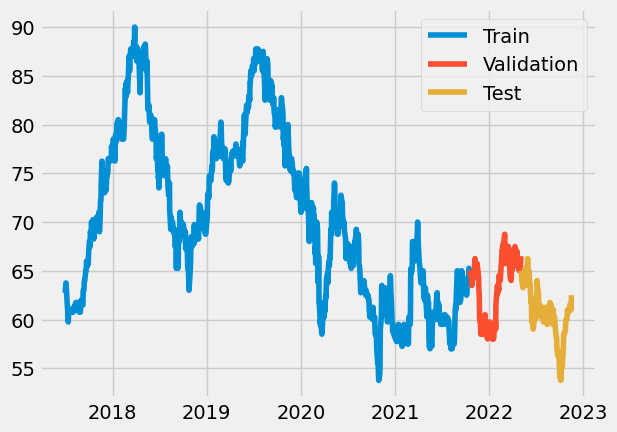

In [647]:
plt.plot(Dates_train,y_train)
plt.plot(Dates_val,y_val)
plt.plot(Dates_test,y_test)
plt.legend(['Train','Validation','Test'])

In [648]:

model = Sequential([layers.Input(( length_of_window-1 , 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])
model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
33/33 [==============================] - 2s 21ms/step - loss: 4840.9448 - mean_absolute_error: 69.0153 - val_loss: 3563.4133 - val_mean_absolute_error: 59.6022
Epoch 2/100
33/33 [==============================] - 0s 9ms/step - loss: 3924.2144 - mean_absolute_error: 61.8854 - val_loss: 2073.7844 - val_mean_absolute_error: 45.4135
Epoch 3/100
33/33 [==============================] - 0s 9ms/step - loss: 1627.4109 - mean_absolute_error: 37.9624 - val_loss: 116.0374 - val_mean_absolute_error: 10.1665
Epoch 4/100
33/33 [==============================] - 0s 9ms/step - loss: 133.7075 - mean_absolute_error: 9.4400 - val_loss: 111.6594 - val_mean_absolute_error: 10.0415
Epoch 5/100
33/33 [==============================] - 0s 9ms/step - loss: 68.4985 - mean_absolute_error: 6.9423 - val_loss: 33.1925 - val_mean_absolute_error: 4.8360
Epoch 6/100
33/33 [==============================] - 0s 9ms/step - loss: 49.7577 - mean_absolute_error: 5.8219 - val_loss: 36.0863 - val_mean_absolute_err

Epoch 51/100
33/33 [==============================] - 0s 10ms/step - loss: 0.9093 - mean_absolute_error: 0.6912 - val_loss: 0.6959 - val_mean_absolute_error: 0.6537
Epoch 52/100
33/33 [==============================] - 0s 10ms/step - loss: 0.8856 - mean_absolute_error: 0.6860 - val_loss: 0.5161 - val_mean_absolute_error: 0.5395
Epoch 53/100
33/33 [==============================] - 0s 10ms/step - loss: 0.9111 - mean_absolute_error: 0.6931 - val_loss: 0.5224 - val_mean_absolute_error: 0.5435
Epoch 54/100
33/33 [==============================] - 0s 9ms/step - loss: 0.8723 - mean_absolute_error: 0.6855 - val_loss: 0.5369 - val_mean_absolute_error: 0.5527
Epoch 55/100
33/33 [==============================] - 0s 10ms/step - loss: 0.9002 - mean_absolute_error: 0.6925 - val_loss: 0.5319 - val_mean_absolute_error: 0.5557
Epoch 56/100
33/33 [==============================] - 0s 10ms/step - loss: 0.9108 - mean_absolute_error: 0.7047 - val_loss: 0.5470 - val_mean_absolute_error: 0.5590
Epoch 57/10

33/33 [==============================] - 0s 3ms/step


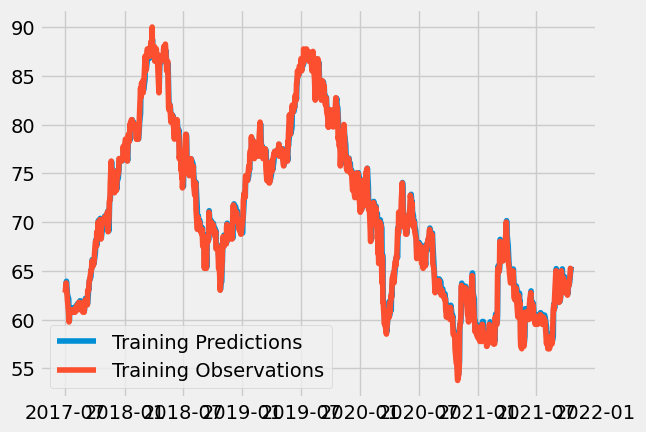

In [649]:
train_predictions = model.predict(X_train)

plt.plot(Dates_train, train_predictions)
plt.plot(Dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

5/5 [==============================] - 0s 3ms/step


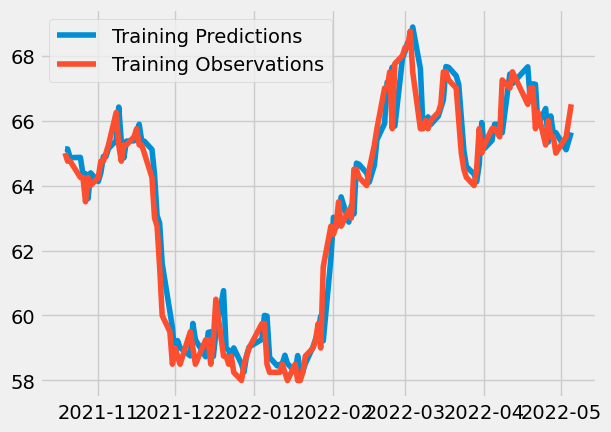

In [650]:
val_predictions = model.predict(X_val)

plt.plot(Dates_val, val_predictions)
plt.plot(Dates_val, y_val)
plt.legend(['Training Predictions', 'Training Observations'])

5/5 [==============================] - 0s 3ms/step


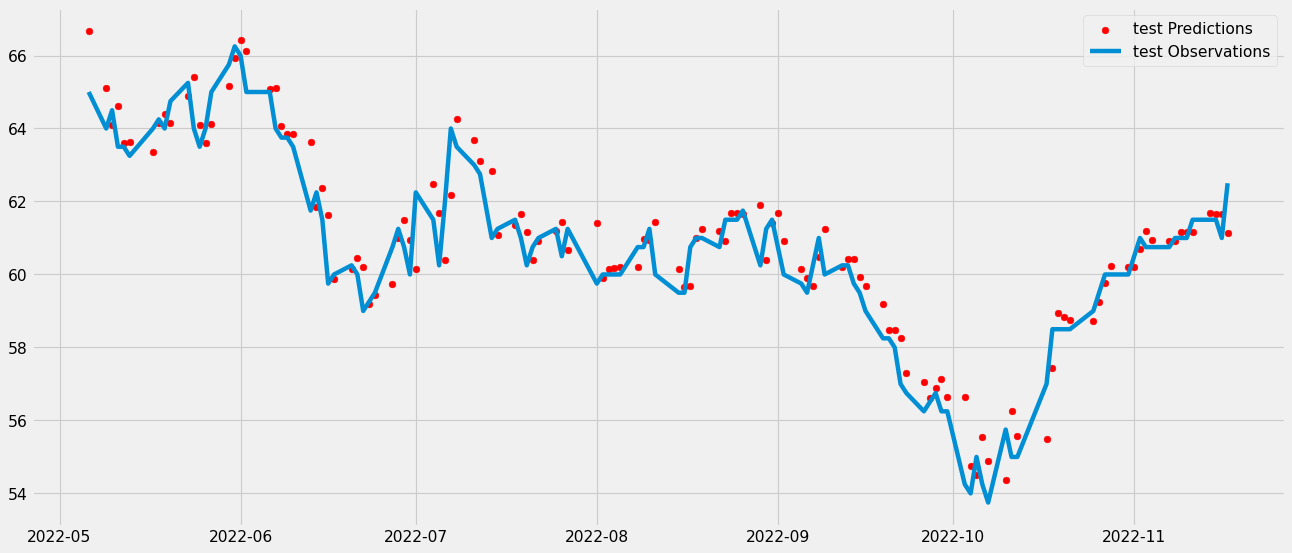

In [651]:
plt.figure(figsize=(18, 8), dpi=80)
test_predictions = model.predict(X_test)

plt.scatter(Dates_test, test_predictions,color = 'red')
plt.plot(Dates_test, y_test)
plt.legend(['test Predictions', 'test Observations'])

In [652]:
test_predictions,y_test

(array([[66.66402 ],
        [65.10806 ],
        [64.08233 ],
        [64.60643 ],
        [63.599106],
        [63.621563],
        [63.365276],
        [64.15901 ],
        [64.406044],
        [64.13778 ],
        [64.90169 ],
        [65.40442 ],
        [64.10795 ],
        [63.590256],
        [64.1181  ],
        [65.17302 ],
        [65.93372 ],
        [66.41751 ],
        [66.12903 ],
        [65.09111 ],
        [65.09911 ],
        [64.08089 ],
        [63.850468],
        [63.862587],
        [63.622112],
        [61.841824],
        [62.36478 ],
        [61.621307],
        [59.884407],
        [60.14098 ],
        [60.44263 ],
        [60.21168 ],
        [59.195145],
        [59.443836],
        [59.725353],
        [61.009346],
        [61.48964 ],
        [60.93511 ],
        [60.14507 ],
        [62.47044 ],
        [61.688793],
        [60.396297],
        [62.17224 ],
        [64.26335 ],
        [63.69643 ],
        [63.121895],
        [62.8443  ],
        [61.0

In [653]:
#finaltest = y_test[-6:]
#finaldate = Dates 

# Tomorrow Prediction

In [654]:
tmr =  model.predict(X[-1:]) # last stack of X (TRAINSET)

1/1 [==============================] - 0s 20ms/step


In [655]:
Last6Days = Dates[-(length_of_window-1):]
#LastDates= np.append(LastDates,Dates[-1:] + timedelta(days=1))
LastDates= (Dates[-1:] + timedelta(days=1))

In [656]:
Last6Days

array([Timestamp('2022-10-12 00:00:00'), Timestamp('2022-10-17 00:00:00'),
       Timestamp('2022-10-18 00:00:00'), Timestamp('2022-10-19 00:00:00'),
       Timestamp('2022-10-20 00:00:00'), Timestamp('2022-10-21 00:00:00'),
       Timestamp('2022-10-25 00:00:00'), Timestamp('2022-10-26 00:00:00'),
       Timestamp('2022-10-27 00:00:00'), Timestamp('2022-10-28 00:00:00'),
       Timestamp('2022-10-31 00:00:00'), Timestamp('2022-11-01 00:00:00'),
       Timestamp('2022-11-02 00:00:00'), Timestamp('2022-11-03 00:00:00'),
       Timestamp('2022-11-04 00:00:00'), Timestamp('2022-11-07 00:00:00'),
       Timestamp('2022-11-08 00:00:00'), Timestamp('2022-11-09 00:00:00'),
       Timestamp('2022-11-10 00:00:00'), Timestamp('2022-11-11 00:00:00'),
       Timestamp('2022-11-14 00:00:00'), Timestamp('2022-11-15 00:00:00'),
       Timestamp('2022-11-16 00:00:00'), Timestamp('2022-11-17 00:00:00')],
      dtype=object)

1/1 [==============================] - 0s 21ms/step


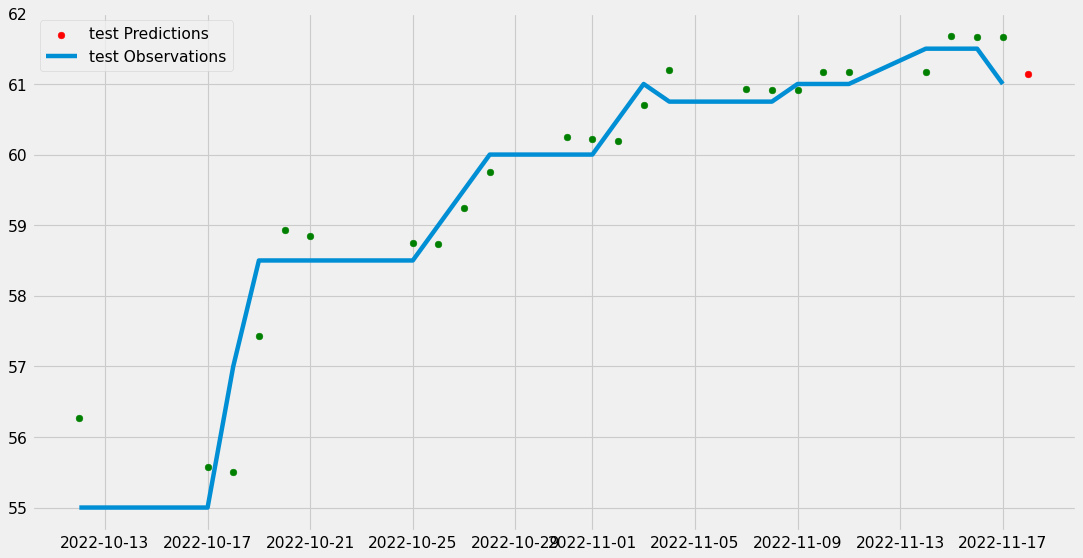

In [657]:
plt.figure(figsize=(15, 8), dpi=80)

plt.scatter(LastDates, tmr,color = 'red') #  PREDICTION

plt.plot(Last6Days, X[-1:].flatten(order='C')) # original 

plt.scatter(Last6Days, model.predict(X[-length_of_window:-1]).flatten(order='C'),color = 'green') # train set predict
plt.legend(['test Predictions', 'test Observations'])

In [658]:
len(X[-10:-1])

9

In [659]:
predict  = model.predict(X[-1:])
predict

1/1 [==============================] - 0s 20ms/step


array([[61.141903]], dtype=float32)

In [660]:
X[-7:-1]

array([[[54.25],
        [54.  ],
        [55.  ],
        [54.25],
        [53.75],
        [55.75],
        [55.  ],
        [55.  ],
        [57.  ],
        [58.5 ],
        [58.5 ],
        [58.5 ],
        [58.5 ],
        [59.  ],
        [59.5 ],
        [60.  ],
        [60.  ],
        [60.  ],
        [60.5 ],
        [61.  ],
        [60.75],
        [60.75],
        [60.75],
        [61.  ]],

       [[54.  ],
        [55.  ],
        [54.25],
        [53.75],
        [55.75],
        [55.  ],
        [55.  ],
        [57.  ],
        [58.5 ],
        [58.5 ],
        [58.5 ],
        [58.5 ],
        [59.  ],
        [59.5 ],
        [60.  ],
        [60.  ],
        [60.  ],
        [60.5 ],
        [61.  ],
        [60.75],
        [60.75],
        [60.75],
        [61.  ],
        [61.  ]],

       [[55.  ],
        [54.25],
        [53.75],
        [55.75],
        [55.  ],
        [55.  ],
        [57.  ],
        [58.5 ],
        [58.5 ],
        [58.5 ],
        [5

In [661]:
model.predict(X[-1:]).flatten(order='C')

1/1 [==============================] - 0s 20ms/step


array([61.141903], dtype=float32)

In [662]:
X[-1:]

array([[[55.  ],
        [55.  ],
        [57.  ],
        [58.5 ],
        [58.5 ],
        [58.5 ],
        [58.5 ],
        [59.  ],
        [59.5 ],
        [60.  ],
        [60.  ],
        [60.  ],
        [60.5 ],
        [61.  ],
        [60.75],
        [60.75],
        [60.75],
        [61.  ],
        [61.  ],
        [61.  ],
        [61.5 ],
        [61.5 ],
        [61.5 ],
        [61.  ]]], dtype=float32)